# BILATERAL HISTOGRAM EQUALIZATION FOR X-RAY IMAGE TONE MAPPING

## Bin slices

Ouvrir image

In [80]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

hdr_img = cv.imread("image/image.tif", -1)

print(hdr_img.shape) #Dimention
print(hdr_img.dtype) #Nb de Bits
print(hdr_img)       #Matrice

cv.imshow('TiffExemple',hdr_img) # Show Image TIFF
cv.waitKey(0)
cv.destroyAllWindows()

(1024, 1024)
uint16
[[ 6997  6923  6745 ...   793   793   794]
 [20567 20161 19566 ... 14057 14057 14057]
 [21081 20508 19928 ... 14615 14616 14616]
 ...
 [16361 16156 15887 ... 15788 14641 13382]
 [16204 15995 15911 ... 15605 14825 13957]
 [ 7150  7127  7069 ...  1832  1759  1735]]


![title](image/Capture1.png)

Show histogram

[0.0000e+00 1.0000e+00 2.0000e+00 ... 6.5534e+04 6.5535e+04 6.5536e+04]
65537


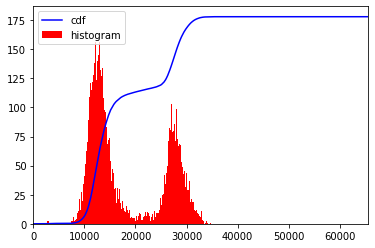

In [81]:

max_bit = 2**16
hist,bins = np.histogram(hdr_img.flatten(),max_bit,[0,max_bit])
print(bins)
print(len(bins))
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(hdr_img.flatten(),max_bit,[0,max_bit], color = 'r')
plt.xlim([0,max_bit])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Stretch hist

In [82]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*max_bit/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint16')

img_stretch = cdf[hdr_img]

cv.imshow('TiffStretchExemple',img_stretch)
cv.waitKey(0)
cv.destroyAllWindows()

![title](image/Capture2.png)

show stretch histogram

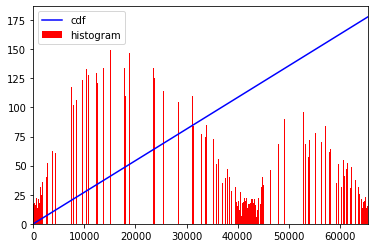

In [83]:
max_bit = 2**16
hist,bins = np.histogram(img_stretch.flatten(),max_bit,[0,max_bit])


cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_stretch.flatten(),max_bit,[0,max_bit], color = 'r')
plt.xlim([0,max_bit])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Bin Division

In [96]:
'''
division = 2184
binlist = []

for i in range(30):
    Min_range = i * division
    Max_range = (i+1) * division

    img_scaled = cv.normalize(hdr_img, dst=None, alpha=Min_range, beta=Max_range, norm_type=cv.NORM_MINMAX)
    binlist.append(img_scaled)


#print(binlist)
print(len(binlist))

#print(binlist[0])
print(len(binlist[0][0]))
'''

30
1024


Bin Division 2

In [99]:
division = 2184
binlist = []

for i in range(30):
    Min_range = i * division
    Max_range = (i+1) * division

    hist,bins = np.histogram(hdr_img.flatten(),Max_range,[Min_range,Max_range])
    binlist.append(bins)


#print(binlist)
print(len(binlist))

#print(binlist[0])
print(len(binlist[0]))

30
2185


Afficher Un Bin

In [100]:

cv.imshow('TiffStretchExemple',binlist[21])
cv.waitKey(0)
cv.destroyAllWindows()